# Textual Analysis

In [1]:
# Basic packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML and NLP packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

## Importing Data

The data provide news headlines for DOW JONES 30 stocks, totaling 9,470 headlines. The data is labeled: the sentiment feature takes the value of 0 or 1 based on the sentiment of the news headline for the company.

In [3]:
df=pd.read_csv('data/data13_LabeledNewsData.csv', encoding="ISO-8859-1")
df.sample(5)
#df.shape

,datetime,headline,ticker,sentiment
330,12/23/18 23:47,Jefferies Financial Group Lowers 3M Q3 2019 Ea...,MMM,1
4977,12/16/19 12:18,Market in rally mode again today. All-time hig...,JPM,1
662,12/19/18 8:50,American Express $AXP Downgraded to Neutral at...,AXP,0
7766,1/13/19 4:53,As United Technologies Corp (UTX) Stock Declin...,UTX,0
3171,9/30/19 9:21,$XOM Finished the rally higher the next day th...,XOM,1


## Splitting the Sample into Training and Test Samples

In [4]:
# Create training and test samples based on the text:

y = df['sentiment']
text = df['headline']
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.25, random_state=666)
text_test.sample(3)

5679    .@JimCramer: If a high-quality stock is down e...
4190    $IBM to report its Q4 earnings in a.h. As of Q...
2987    Both $SPX and $DOW need to remain above yester...
Name: headline, dtype: object

## Feature representation with Bag of Words

In [7]:
# Define the vectorizer
bw = CountVectorizer(lowercase=True, stop_words='english') 
#'preprocessor' and 'tokenizer' options allow you to write external functions and use it here

# Build a vocabulary from our training texts
bw.fit(text_train)

#transform training texts to a Document Term Matrix (DTM)
dtm_train = bw.transform(text_train)

#transform testing texts to a DTM
dtm_test = bw.transform(text_test)

# dtm_test
# print(dtm_test[0])

## Prediction with a Naive Bayes Model

NB Accuracy Score = 91.26%
NB Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       981
           1       0.91      0.95      0.93      1387

    accuracy                           0.91      2368
   macro avg       0.91      0.91      0.91      2368
weighted avg       0.91      0.91      0.91      2368



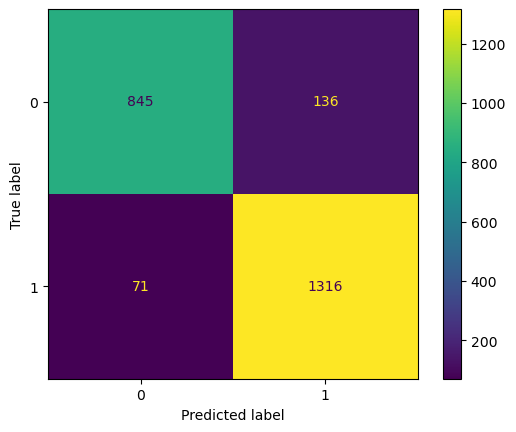

In [9]:
# Fit model, predict, and display results

nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'NB Accuracy Score = {accuracy_score(y_test, y_pred):.2%}')

print('NB Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)

## Feature representation with TF-IDF

In [10]:
# Create the document term matrices for the training and test samples:

tfidf = TfidfVectorizer(lowercase=True, stop_words='english') 
#'preprocessor' and 'tokenizer' options allow you to write external functions and use it here

# use the model to create a document term matrix
# Fit creates the vocabulary. Transform populates the DTM for training data. We can do both in one step:
dtm_train = tfidf.fit_transform(text_train)

#transform testing texts to a DTM
dtm_test = tfidf.transform(text_test)

# dtm_test
# print(dtm_test[0])

## Prediction with a Naive Bayes Model

NB Accuracy Score = 88.81%
NB Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       981
           1       0.86      0.97      0.91      1387

    accuracy                           0.89      2368
   macro avg       0.90      0.87      0.88      2368
weighted avg       0.90      0.89      0.89      2368



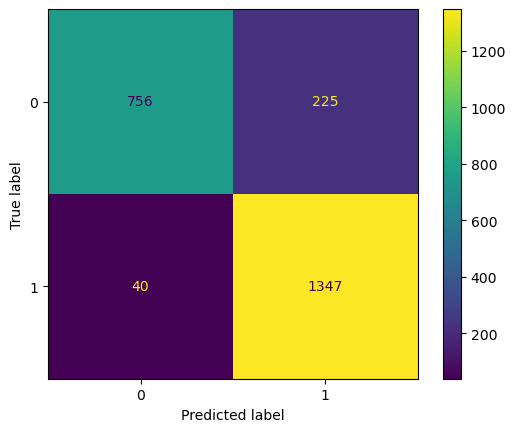

In [11]:
# Fit model, predict, and display results

nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'NB Accuracy Score = {accuracy_score(y_test, y_pred):.2%}')

print('NB Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)

## Using N-Grams

Here I've included n-grams and stemming (below) for learning purposes. Becaues our sample data here are the news headlines (not the text) you will see that these preprocessing steps do not necessarily make big improvements to the classification results. However, when we are dealing with long-format text (e.g., body of the news articles) these steps are typically very useful.

In [12]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3))
dtm_train = tfidf.fit_transform(text_train)
dtm_test = tfidf.transform(text_test)

# dtm_test
# print(dtm_test[0])

NB Accuracy Score = 88.34%
NB Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       981
           1       0.85      0.98      0.91      1387

    accuracy                           0.88      2368
   macro avg       0.90      0.86      0.87      2368
weighted avg       0.89      0.88      0.88      2368



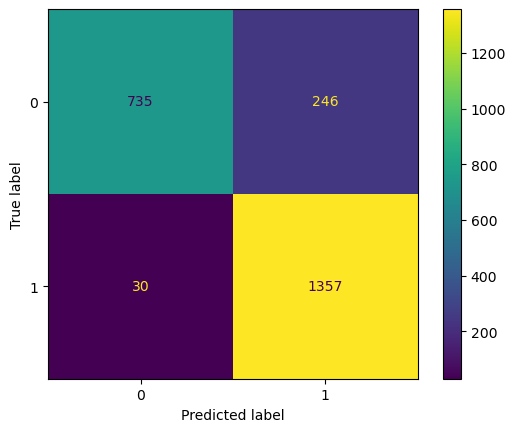

In [13]:
# Fit model, predict, and display results

nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'NB Accuracy Score = {accuracy_score(y_test, y_pred):.2%}')

print('NB Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)

## Stemming

We want to apply stemming in text classification. We will use `PorterStemmer` in the `nltk` module for stemming.

We first define a function `tokenize`. The function has one argument `text` which is the text to be tokenized. The function uses `nltk.word_tokenize` function to tokenize `text` then apply `PorterStemmer` to stem the tokens. We then  set the `tokenizer` argument in `CounterVectorizer` or `TfidfVectorizer` with this custom `tokenize` function and use the vectorized features for prediciton.

The following code takes longer to finish due to stemming, but it does give a better classification accuracy.

In [14]:
# Define function to tokenize text and apply stemmer
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [tkn for tkn in tokens if tkn not in string.punctuation]

    stems = map(PorterStemmer().stem, tokens)
    return stems

# Note: string.punctuation will give the all sets of punctuation (output=!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)

In [17]:
# Punkt Sentence Tokenizer: This tokenizer divides a text into a list of sentences. This is needed for word_tokenize().
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/asanati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3), tokenizer=tokenize)
dtm_train = tfidf.fit_transform(text_train)
dtm_test = tfidf.transform(text_test)

# dtm_test
# print(dtm_test[0])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

NB Accuracy Score = 88.18%
NB Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       981
           1       0.85      0.98      0.91      1387

    accuracy                           0.88      2368
   macro avg       0.90      0.86      0.87      2368
weighted avg       0.89      0.88      0.88      2368



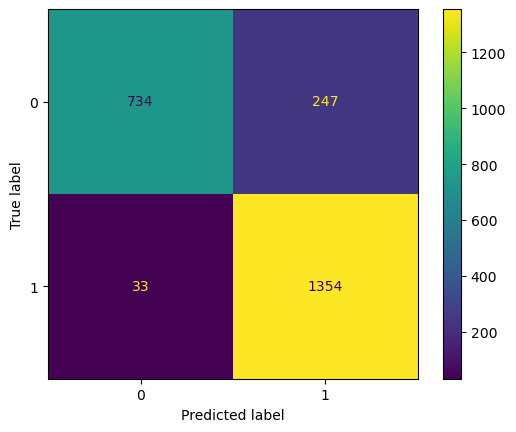

In [19]:
# Fit model, predict, and display results

nb = MultinomialNB()
nb.fit(dtm_train, y_train)
y_pred = nb.predict(dtm_test)

print(f'NB Accuracy Score = {accuracy_score(y_test, y_pred):.2%}')

print('NB Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(nb, dtm_test, y_test)